In [1]:
from numpy.random import randn
from numpy.random import seed
import pandas as pd
import seaborn as sns

In [2]:
seed(1)
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
df = pd.DataFrame({'A' :data1, 'B':data2})

In [3]:
df.head()

,A,B
0,132.486907,180.954546
1,87.764872,113.439787
2,89.436565,144.516408
3,78.540628,125.300304
4,117.308153,152.197387


# Correlation metrics

In [18]:
df.cov()

,a,b,c,d
a,1.7,-0.5,2.3,0.5
b,-0.5,0.5,-0.5,0.0
c,2.3,-0.5,3.7,0.5
d,0.5,0.0,0.5,0.5


# pearson coff

In [21]:
df.corr(method='pearson')

,a,b,c,d
a,1.000000,-0.542326,0.917070,0.542326
b,-0.542326,1.000000,-0.367607,0.000000
c,0.917070,-0.367607,1.000000,0.367607
d,0.542326,0.000000,0.367607,1.000000


In [22]:
from scipy.stats import pearsonr

In [24]:
corr,p_value = pearsonr(df['a'],df['b'])

In [26]:
corr

-0.5423261445466404

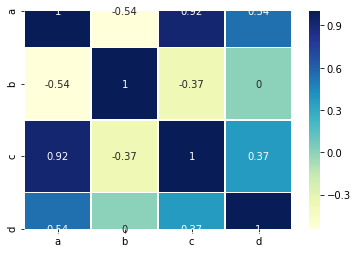

In [27]:
sns.heatmap(df.corr(method='pearson'), annot=True, cmap="YlGnBu",fmt='.2g',linewidths=.5)

# Spearman coff

In [28]:
df.corr(method='spearman')

,a,b,c,d
a,1.000000,-0.458831,0.974679,0.573539
b,-0.458831,1.000000,-0.447214,0.000000
c,0.974679,-0.447214,1.000000,0.447214
d,0.573539,0.000000,0.447214,1.000000


In [31]:
from scipy.stats import spearmanr
corr,p_value = spearmanr(df['a'],df['b'])

In [13]:
corr

0.8724050484050484

# Varrience Influence test

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import numpy as np

In [33]:
df = pd.DataFrame(
    {'a': [1, 1, 2, 3, 4],'b': [2, 2, 3, 2, 1],
     'c': [4, 6, 7, 8, 9], 'd': [4, 3, 4, 5, 4]} )
df.head()

,a,b,c,d
0,1,2,4,4
1,1,2,6,3
2,2,3,7,4
3,3,2,8,5
4,4,1,9,4


In [34]:
X= add_constant(df)
X.head()

,const,a,b,c,d
0,1.0,1,2,4,4
1,1.0,1,2,6,3
2,1.0,2,3,7,4
3,1.0,3,2,8,5
4,1.0,4,1,9,4


In [35]:
pd.Series(data=[variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const    136.875
a         22.950
b          3.000
c         12.950
d          3.000
dtype: float64